<a href="https://colab.research.google.com/github/Abhisheik27/dsc204a-w24/blob/main/weatherpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("/content/DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [2]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [8]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [4]:
figure = px.line(df, x="date", y="meantemp", title = 'Mean Temperature in Delhi over the years')
figure.show()

In [5]:
figure = px.line(df, x="date", y="humidity", title = 'HUmidity in Delhi over the years')
figure.show()

In [6]:
figure = px.scatter(data_frame = df, x="humidity",
                    y="meantemp", size="meantemp",
                    trendline="ols",
                    title = "Relationship Between Temperature and Humidity")
figure.show()

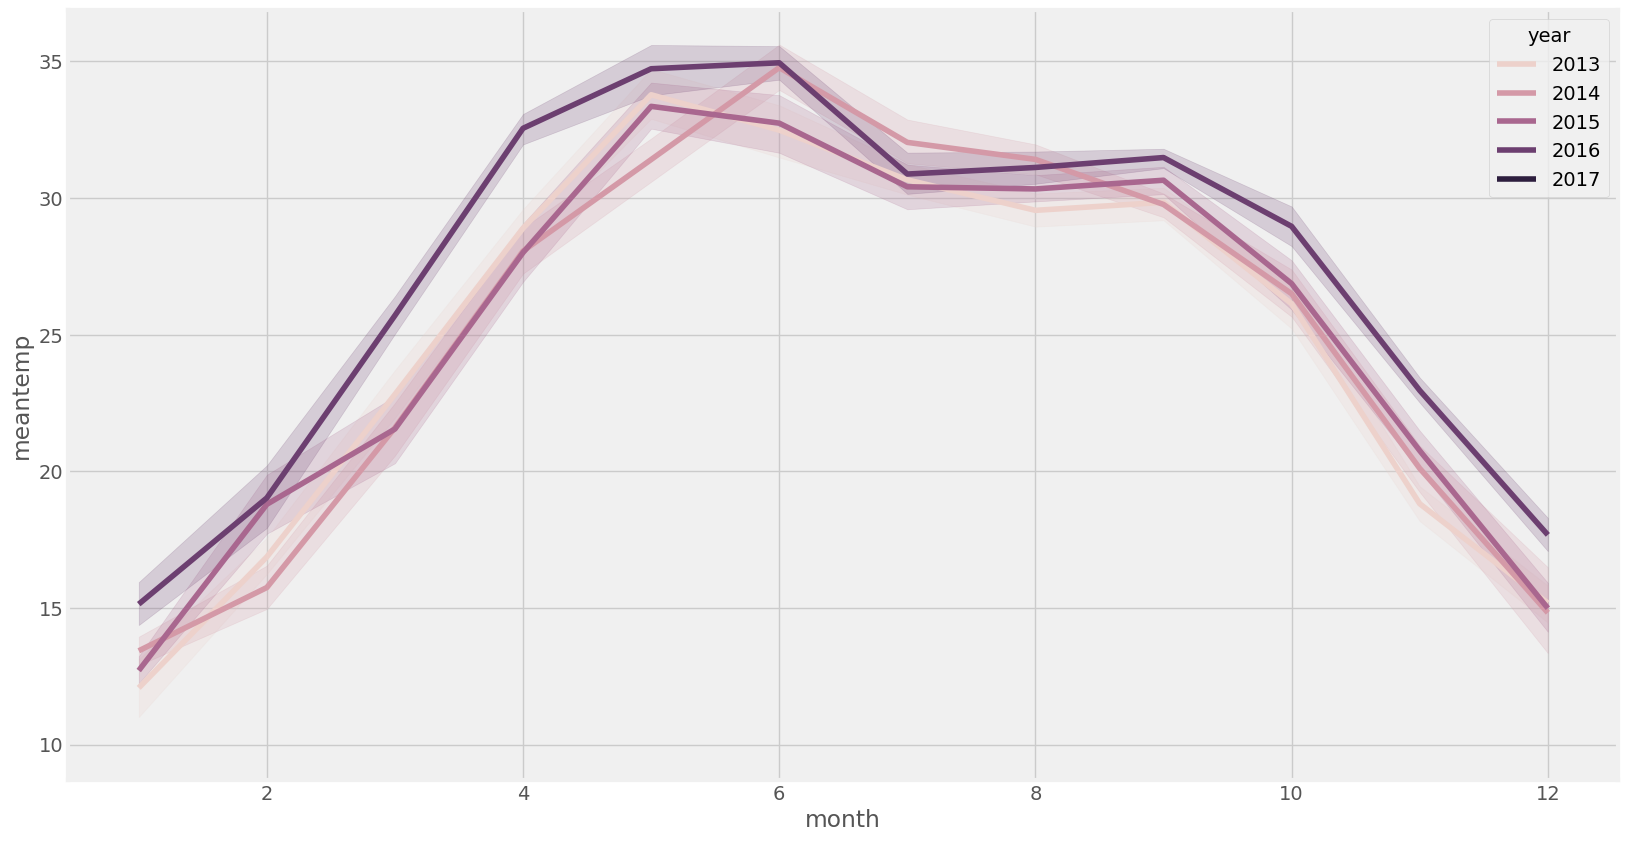

In [16]:
plt.figure(figsize =(20,10))
plt.style.use("fivethirtyeight")
sns.lineplot(data=df, x = 'month', y = 'meantemp', hue = 'year')
plt.show()


In [18]:
%pip install prophet

In [21]:
df = df.rename(columns = {"date": "ds", "meantemp":"y"})

In [24]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(df)
forecasts = model.make_future_dataframe(periods=1905)
predictions = model.predict(forecasts)
predictions
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkhaa4fbf/1r5q5ci9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkhaa4fbf/bbc6m7cb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38206', 'data', 'file=/tmp/tmpkhaa4fbf/1r5q5ci9.json', 'init=/tmp/tmpkhaa4fbf/bbc6m7cb.json', 'output', 'file=/tmp/tmpkhaa4fbf/prophet_modelo0k5yjg8/prophet_model-20240227054444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:44:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:44:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [26]:
dftest = pd.read_csv("/content/DailyDelhiClimateTest.csv")
dftest.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [28]:
test_df = dftest[["date", "meantemp"]]
test_df

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889
...,...,...
109,2017-04-20,34.500000
110,2017-04-21,34.250000
111,2017-04-22,32.900000
112,2017-04-23,32.875000


In [29]:
predictions.to_csv("predictions.csv")

In [31]:
pred_data = predictions[["ds", "yhat"]]
pred_data = pred_data[1461:1575]
pred_data

,ds,yhat
1461,2017-01-01,14.350417
1462,2017-01-02,14.560721
1463,2017-01-03,14.646778
1464,2017-01-04,14.813565
1465,2017-01-05,14.800330
...,...,...
1570,2017-04-20,32.872454
1571,2017-04-21,33.016232
1572,2017-04-22,33.097831
1573,2017-04-23,33.144384


In [32]:
y_test = test_df["meantemp"].tolist()
y_test_pred = pred_data["yhat"].tolist()

In [33]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 2.19
Mean squared error = 7.09
Median absolute error = 1.81
Explain variance score = 0.85
R2 score = 0.82
